In [3]:
from BigDFT import DoS as D
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

We study the energy eigenvalues and eigenstates of a potential well of width 2a and depth $V_0$ simmetrically placed around the origin. The system is studied inside a "computational domain" given a 1D box of width 2L. The computational domain is centred at the origin so to preserve the symmetry of the potential well.

We set the paramteres of the system for the numerical analysis

In [4]:
V0 = 500
a = 0.5

# Even solutions

We consider even solutions (both bounded and unbounded) and compute the associated density of states. The generic even solution is parametrized as follows:
$$
\psi(x) = e^{i k x} + A e^{-ikx} \;\;, x < -a \\
\psi(x) = B cos(q x) \;\;, -a< x < a \\
\psi(x) = e^{-i k x} + A e^{ikx} \;\;, x > a
$$
We impose continuity of the wf and its first derivative at $x=\pm a$. The four equations are equal in pairs and so we obtain two equations for A and B:
$$
e^{-ika}+Ae^{ika} = Bcos(qa) \\
ik(e^{-ika}-Ae^{ika}) = Bqsin(qa)
$$
The two equations can be solved analitically and provide:
$$
A = e^{-2ika}\frac{ik-qtan(qa)}{ik+qtan(qa)} \\
B = 2\frac{e^{-ika}}{cos(qa)}\frac{ik}{ik+qtan(qa)}
$$
The SE provides a between the energy and the values of k and q, namely:
$$
k^2 =2E \;\;, \quad q^2 = 2(E+V_0) 
$$

## Bound solutions

We consider solutions with negative energy in the range between $-V_0$ and 0.

We introduce the parameter $\mu=\sqrt{2|E|}$, according to this position k and q can be expressed as functions of $\mu$ as follows:
$$
k=-i\mu \;\; , \quad q = \sqrt{-\mu^2+2V_0}
$$

The presence of the finite box imposes a further BC on the wf, that is $\psi(\pm L)=0$. This condition implies that
$$
A = - e^{-2\mu L}
$$
Matching this condition with the expression of A provides:
$$
-\frac{\mu-qtan(qa)}{\mu+qtan(qa)} = e^{-2\mu (L-a)} 
$$
This is an equation for $\mu$ and the solutions have to be sought in the range $(0,\sqrt{2V_0}]$. The associated energy levels are simply obtained through $E=-\mu^2/2$

We compute the energy levels:

In [5]:
def q(mu) : return np.sqrt(-mu**2+2*V0)
def lhs(mu) : return -(mu-q(mu)*np.tan(q(mu)*a))/(mu+q(mu)*np.tan(q(mu)*a))
def rhs(mu) : return np.exp(-2.0*mu*(L-a))

In [6]:
muMax = np.sqrt(2.0*V0)
print (muMax)
mu = np.linspace(0,muMax,1000)

31.622776601683793


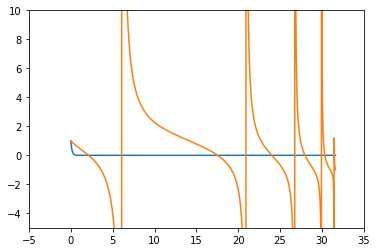

In [8]:
# Choose a value of L and plot the two members of the constraint equation
L = 4.0

plt.plot(mu,rhs(mu))
plt.plot(mu,lhs(mu))
plt.xlim([-5,35])
plt.ylim([-5,10])
plt.show()

Solutions are the intersection points of the two curves. We solve the equation using optimize.brentq in all the mu interval in which the function changes sign. The point $\mu=0$ is a solution but it is not included here since we are looking for negative energies.

In [9]:
def eq_mu(mu) : return lhs(mu)-rhs(mu)

In [10]:
boxSizes = [2.0,4.0,8.0]

In [11]:
energies_bound = {}
for b in boxSizes:
    L = b
    print 'analysis for L = ', L
    energies_bound[b] = []
    
    s = np.sign(eq_mu(mu))
    mu_zeroes = []
    for i in range(len(s)-1):
        if s[i]+s[i+1] == 0:
            zero = optimize.brentq(eq_mu, mu[i], mu[i+1])
            mu_zeroes.append(zero)
    # cut the spurious solutions
    mu_zeroes = [mu_zeroes[i] for i in range(0,len(mu_zeroes),2)]
    print 'number of even bound states', len(mu_zeroes)
    #print mu_zeroes

    for m in mu_zeroes:
        energies_bound[b].append(-0.5*m**2)

analysis for L =  2.0
number of even bound states 6
analysis for L =  4.0
number of even bound states 6
analysis for L =  8.0
number of even bound states 6


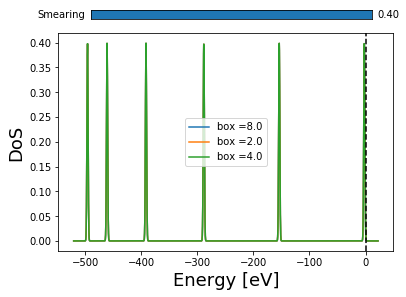

In [13]:
dos=D.DoS(fermi_level=0)
for b in energies_bound:
    dos.append(energies=np.array([energies_bound[b]]),label='box ='+str(b))
dos.plot(sigma=1)

## Unbound solutions

In this case it is convenient to use k as main variable. The relation between q and k reads:
$$
q = \sqrt{k^2+2V_0}
$$
and the equation for A, together with the BC provide:
$$
-\frac{ik-qtan(qa)}{ik+qtan(qa)} = e^{-2ik(L-a)} 
$$
Solutions of this equations have to be sought in the range $[0,\infty)$. The associated values of the energies 
are related to k by $E=k^2/2$.

We can split the previous condition in its real and imaginary part and look for values of k that satisfy both:
$$
-\frac{k^2-(qtan(qa))^2}{k^2+(qtan(qa))^2} = cos(2k(L-a)) \\
\frac{2kqtan(qa)}{k^2+(qtan(qa))^2} = sin(2k(L-a))
$$

We compute the energy levels

In [14]:
def q(k) : return np.sqrt(k**2+2*V0)
def re_lhs(k) : return -(k**2-(q(k)*np.tan(q(k)*a))**2)/(k**2+(q(k)*np.tan(q(k)*a))**2)
def re_rhs(k) : return np.cos(2.0*k*(L-a))
def im_lhs(k) : return 2*k*q(k)*np.tan(q(k)*a)/(k**2+(q(k)*np.tan(q(k)*a))**2)
def im_rhs(k) : return np.sin(2.0*k*(L-a))

In [15]:
kpoints = 50000 # criterion for this parameter : the number of solution in the greates box has to be converged
kMax = 40
Emax = 0.5*kMax**2
print 'Emax = ', Emax
k = np.linspace(0,kMax,kpoints)

Emax =  800.0


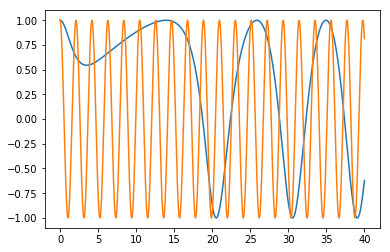

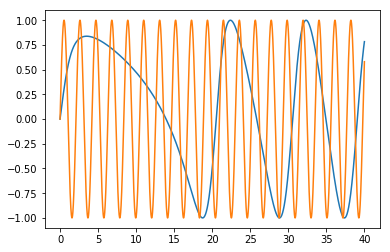

In [16]:
# Choose a value of L and plot the two members of the constraint equation
L = 2.0

%matplotlib inline
plt.plot(k,re_lhs(k))
plt.plot(k,re_rhs(k))
plt.show()
plt.plot(k,im_lhs(k))
plt.plot(k,im_rhs(k))
plt.show()

In [17]:
def eq_re_k(k) : return re_lhs(k)-re_rhs(k)
def eq_im_k(k) : return im_lhs(k)-im_rhs(k)

In [18]:
boxSizes = [2.0,4.0,8.0,12.0,20.0]

In [19]:
energies_unbound = {}
for b in boxSizes:
    L = b
    print 'analysis for L = ', L
    energies_unbound[b] = []
    
    s = np.sign(eq_re_k(k))
    #print s
    k_zeroes_re = []
    for i in range(len(s)-1):
        if s[i]+s[i+1] == 0:
            zero = optimize.brentq(eq_re_k, k[i], k[i+1])
            k_zeroes_re.append(zero)
    #print 'number of solution for the real part', len(k_zeroes_re)

    k_zeroes = []
    for kval in k_zeroes_re:
        if np.allclose(eq_im_k(kval),0):
            #print eq_im_k(kval)
            k_zeroes.append(kval)
    print 'number of unbound solutions', len(k_zeroes)
    
    energies_unbound[b].append(0.0)
    for kval in k_zeroes:
        energies_unbound[b].append(0.5*kval**2)

analysis for L =  2.0
number of unbound solutions 21
analysis for L =  4.0
number of unbound solutions 47
analysis for L =  8.0
number of unbound solutions 98
analysis for L =  12.0
number of unbound solutions 149
analysis for L =  20.0
number of unbound solutions 248


Analysis of the dos

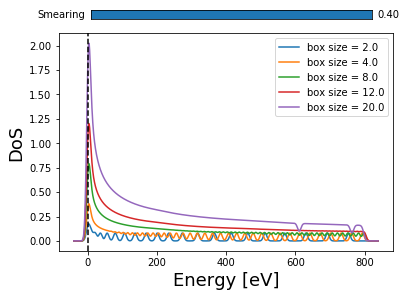

In [20]:
%matplotlib inline
dos=D.DoS(fermi_level=0)
size = energies_unbound.keys()
size.sort()
for b in size:
    dos.append(energies=np.array([energies_unbound[b]]),label='box ='+str(b))
dos.plot(sigma=5)

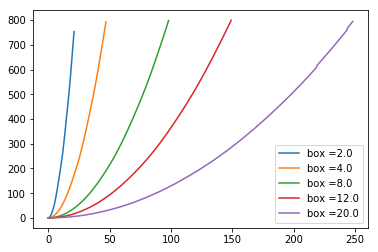

In [28]:
# continuum collapse
size = energies_unbound.keys()
size.sort()
for b in size:
    ind = [i for i in range(len(energies_unbound[b]))]
    plt.plot(ind,energies_unbound[b],label='box ='+str(b))
plt.legend()
plt.show()

It is also interesting to compute the dos by performing a binning in the E interval and counting how many points fall in each bin

In [39]:
numbin = 20
deltaE = Emax/numbin
Eval = [deltaE*i for i in range(numbin)]
dens = {}
size = energies_unbound.keys()
size.sort()
for b in size: 
    dens[b] = [0.0 for i in range(numbin)]
    for e in energies_unbound[b]:
        dens[b][int(e/deltaE)] += 1.0/deltaE

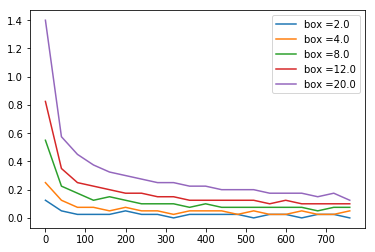

In [40]:
size = energies_unbound.keys()
size.sort()
for b in size:
    plt.plot(Eval,dens[b],label='box ='+str(b))
plt.legend()
plt.show()

In [41]:
size = energies_unbound.keys()
size.sort()
for b in size:
    Nstate = 0
    for num in dens[b]:
        Nstate += num
    Nstate = Nstate*deltaE
    print Nstate

22.0
48.0
99.0
150.0
249.0


In [42]:
########################################################

In 1d the dos goes like $1/\sqrt(2E)$

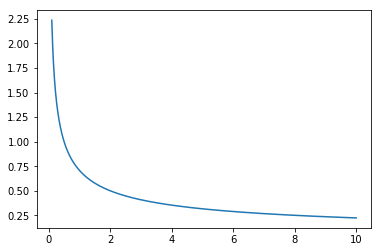

In [412]:
f = lambda x : 1.0/np.sqrt(2.0*x)
x = np.linspace(0.1,10,1000)
plt.plot(x,f(x))